   Epoch  Train Loss  Test Loss   LPIPS    SSIM    FID
0    0.0    0.010261   0.009624  0.1002  0.7974  33.71
1    1.0    0.010091   0.009707  0.1023  0.7966  32.42
2    2.0    0.010127   0.010940  0.1021  0.7952  32.43
3    3.0    0.010018   0.009592  0.0954  0.8039  31.24
4    4.0    0.009949   0.009279  0.0921  0.8083  29.90


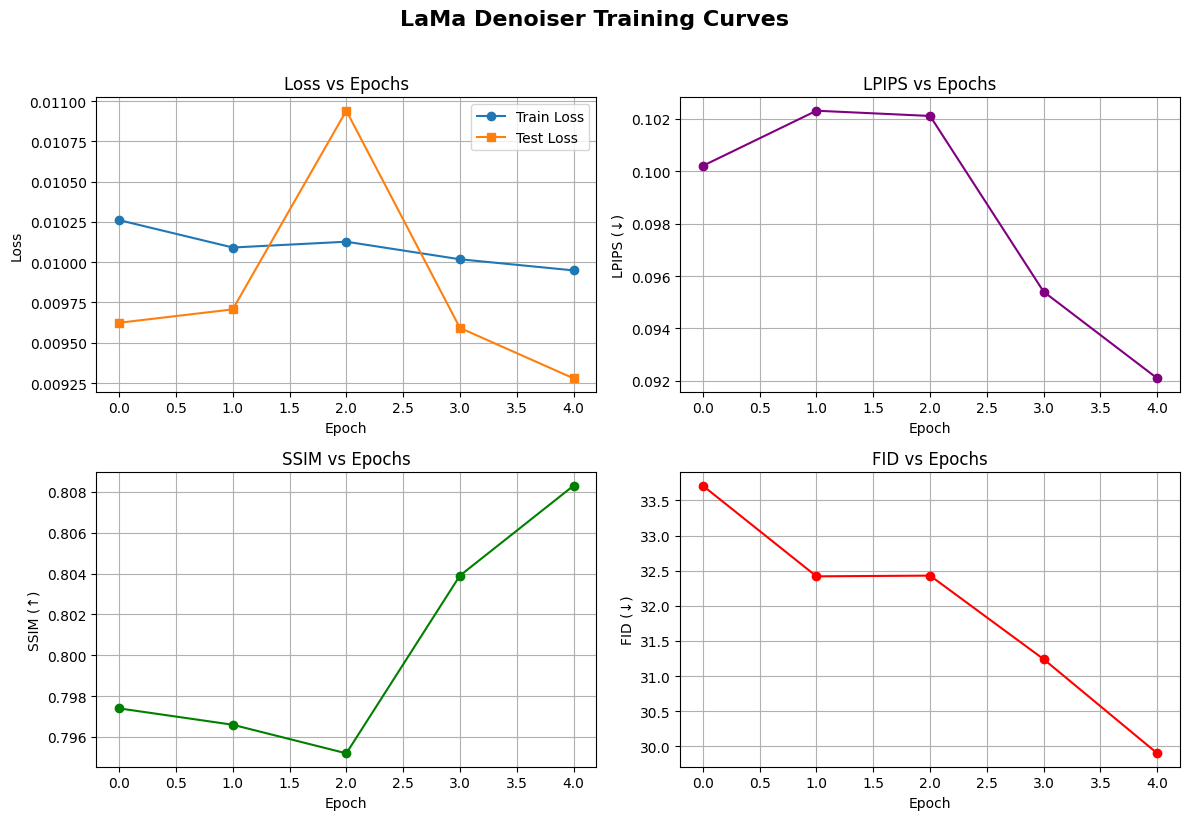

In [4]:
import re
import matplotlib.pyplot as plt
import pandas as pd

# Paste your model logs here ↓
log_text = """
2025-11-12 14:52:15.535 | INFO     | __main__:<cell line: 0>:94 - Epoch 0: Train Loss=0.010261 | Test Loss=0.009624 | LPIPS=0.1002 | SSIM=0.7974 | FID=33.71
2025-11-12 14:53:28.513 | INFO     | __main__:<cell line: 0>:94 - Epoch 1: Train Loss=0.010091 | Test Loss=0.009707 | LPIPS=0.1023 | SSIM=0.7966 | FID=32.42
2025-11-12 14:54:44.841 | INFO     | __main__:<cell line: 0>:94 - Epoch 2: Train Loss=0.010127 | Test Loss=0.010940 | LPIPS=0.1021 | SSIM=0.7952 | FID=32.43
2025-11-12 14:56:03.110 | INFO     | __main__:<cell line: 0>:94 - Epoch 3: Train Loss=0.010018 | Test Loss=0.009592 | LPIPS=0.0954 | SSIM=0.8039 | FID=31.24
2025-11-12 14:57:22.847 | INFO     | __main__:<cell line: 0>:94 - Epoch 4: Train Loss=0.009949 | Test Loss=0.009279 | LPIPS=0.0921 | SSIM=0.8083 | FID=29.90
"""

# -----------------------------
# 🔍 Extract metrics with regex
# -----------------------------
pattern = r"Epoch\s+(\d+):\s+Train Loss=([\d\.]+)\s+\|\s+Test Loss=([\d\.]+)\s+\|\s+LPIPS=([\d\.]+)\s+\|\s+SSIM=([\d\.]+)\s+\|\s+FID=([\d\.]+)"
matches = re.findall(pattern, log_text)

# convert to DataFrame
df = pd.DataFrame(matches, columns=["Epoch", "Train Loss", "Test Loss", "LPIPS", "SSIM", "FID"]).astype(float)
print(df)

# -----------------------------
# 📈 Plot all curves
# -----------------------------
plt.figure(figsize=(12, 8))
plt.suptitle(f"LaMa Denoiser Training Curves", fontsize=16, fontweight='bold', y=1.02)


plt.subplot(2, 2, 1)
plt.plot(df["Epoch"], df["Train Loss"], marker='o', label="Train Loss")
plt.plot(df["Epoch"], df["Test Loss"], marker='s', label="Test Loss")
plt.title("Loss vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(df["Epoch"], df["LPIPS"], color='purple', marker='o')
plt.title("LPIPS vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("LPIPS (↓)")
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(df["Epoch"], df["SSIM"], color='green', marker='o')
plt.title("SSIM vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("SSIM (↑)")
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(df["Epoch"], df["FID"], color='red', marker='o')
plt.title("FID vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("FID (↓)")
plt.grid(True)

plt.tight_layout()
plt.show()



Extracted metrics:
    Epoch  Train Loss   Test Loss   LPIPS    SSIM    FID
0    0.0  447.843917  447.726802  0.0372  0.9418  16.69
1    1.0  447.068106  446.622532  0.0370  0.9420  16.65
2    2.0  445.826266  445.769802  0.0369  0.9421  16.59
3    3.0  445.174758  445.455518  0.0368  0.9422  16.54
4    4.0  444.869664  445.754543  0.0369  0.9421  16.60
5    5.0  445.363685  445.420713  0.0369  0.9421  16.57
6    6.0  444.875185  444.929924  0.0368  0.9422  16.51
7    7.0  444.447621  445.128255  0.0368  0.9422  16.54
8    8.0  444.392364  444.798841  0.0368  0.9422  16.50
9    9.0  444.255929  444.958629  0.0369  0.9422  16.52


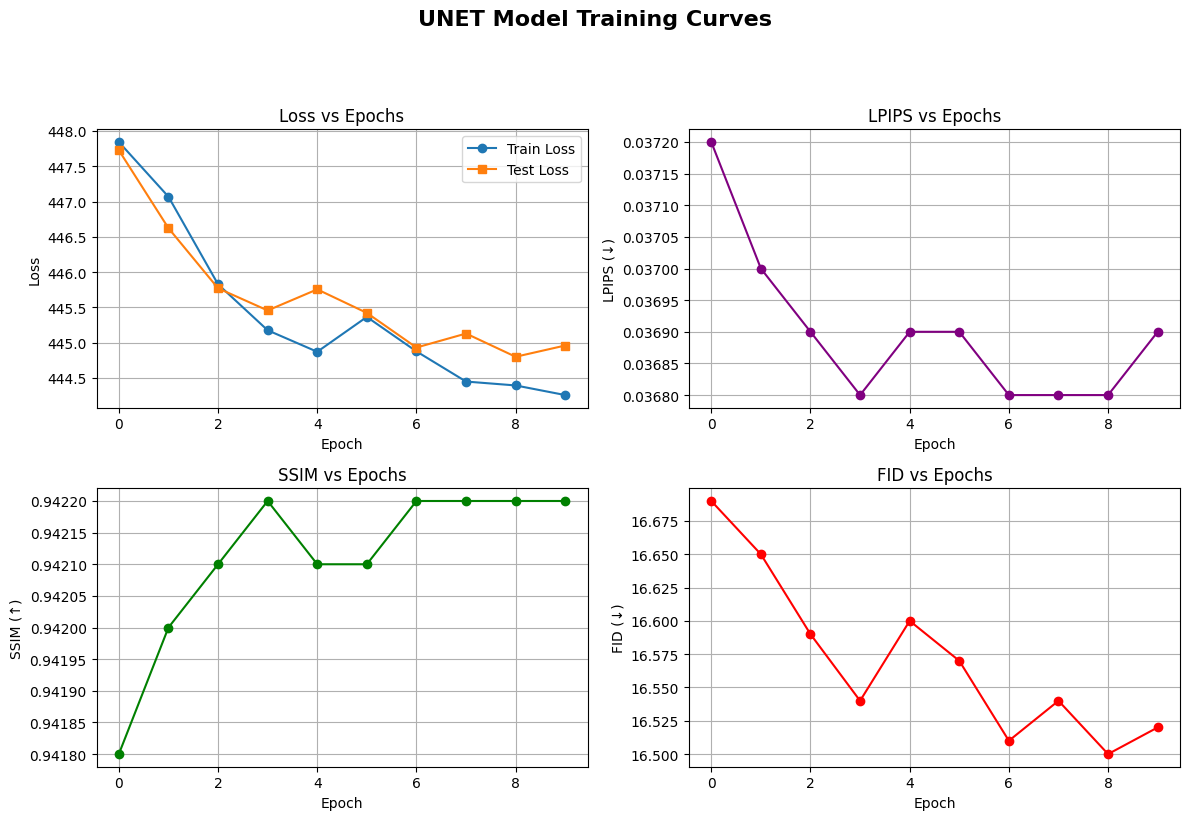

In [10]:
import re
import matplotlib.pyplot as plt
import pandas as pd

# -----------------------------
# 📘 Step 1 — Paste your Ensembler model logs here
# -----------------------------
log_text = """
2025-11-12 15:36:42.161 | INFO     | __main__:<cell line: 0>:97 - Epoch 0: Train Loss=447.843917 | Test Loss=447.726802 | LPIPS=0.0372 | SSIM=0.9418 | FID=16.69
2025-11-12 15:41:37.269 | INFO     | __main__:<cell line: 0>:97 - Epoch 1: Train Loss=447.068106 | Test Loss=446.622532 | LPIPS=0.0370 | SSIM=0.9420 | FID=16.65
2025-11-12 15:46:33.047 | INFO     | __main__:<cell line: 0>:97 - Epoch 2: Train Loss=445.826266 | Test Loss=445.769802 | LPIPS=0.0369 | SSIM=0.9421 | FID=16.59
2025-11-12 15:51:28.979 | INFO     | __main__:<cell line: 0>:97 - Epoch 3: Train Loss=445.174758 | Test Loss=445.455518 | LPIPS=0.0368 | SSIM=0.9422 | FID=16.54
2025-11-12 15:56:24.950 | INFO     | __main__:<cell line: 0>:97 - Epoch 4: Train Loss=444.869664 | Test Loss=445.754543 | LPIPS=0.0369 | SSIM=0.9421 | FID=16.60
2025-11-12 16:01:20.718 | INFO     | __main__:<cell line: 0>:97 - Epoch 5: Train Loss=445.363685 | Test Loss=445.420713 | LPIPS=0.0369 | SSIM=0.9421 | FID=16.57
2025-11-12 16:06:16.274 | INFO     | __main__:<cell line: 0>:97 - Epoch 6: Train Loss=444.875185 | Test Loss=444.929924 | LPIPS=0.0368 | SSIM=0.9422 | FID=16.51
2025-11-12 16:11:11.564 | INFO     | __main__:<cell line: 0>:97 - Epoch 7: Train Loss=444.447621 | Test Loss=445.128255 | LPIPS=0.0368 | SSIM=0.9422 | FID=16.54
2025-11-12 16:16:07.053 | INFO     | __main__:<cell line: 0>:97 - Epoch 8: Train Loss=444.392364 | Test Loss=444.798841 | LPIPS=0.0368 | SSIM=0.9422 | FID=16.50
2025-11-12 16:21:02.768 | INFO     | __main__:<cell line: 0>:97 - Epoch 9: Train Loss=444.255929 | Test Loss=444.958629 | LPIPS=0.0369 | SSIM=0.9422 | FID=16.52
"""

# -----------------------------
# 📘 Step 2 — Define model name for title
# -----------------------------
model_name = "UNET Model"

# -----------------------------
# 🔍 Step 3 — Extract metrics using regex
# -----------------------------
pattern = r"Epoch\s+(\d+):\s+Train Loss=([\d\.]+)\s+\|\s+Test Loss=([\d\.]+)\s+\|\s+LPIPS=([\d\.]+)\s+\|\s+SSIM=([\d\.]+)\s+\|\s+FID=([\d\.]+)"
matches = re.findall(pattern, log_text)

if not matches:
    raise ValueError("⚠️ No matches found — check your log format.")

df = pd.DataFrame(matches, columns=["Epoch", "Train Loss", "Test Loss", "LPIPS", "SSIM", "FID"]).astype(float)

print("\nExtracted metrics:\n", df)

# -----------------------------
# 📈 Step 4 — Plot all curves
# -----------------------------
plt.figure(figsize=(12, 8))
plt.suptitle(f"{model_name} Training Curves", fontsize=16, fontweight='bold', y=1.02)

# 1️⃣ Loss plot
plt.subplot(2, 2, 1)
plt.plot(df["Epoch"], df["Train Loss"], marker='o', label="Train Loss")
plt.plot(df["Epoch"], df["Test Loss"], marker='s', label="Test Loss")
plt.title("Loss vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

# 2️⃣ LPIPS
plt.subplot(2, 2, 2)
plt.plot(df["Epoch"], df["LPIPS"], color='purple', marker='o')
plt.title("LPIPS vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("LPIPS (↓)")
plt.grid(True)

# 3️⃣ SSIM
plt.subplot(2, 2, 3)
plt.plot(df["Epoch"], df["SSIM"], color='green', marker='o')
plt.title("SSIM vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("SSIM (↑)")
plt.grid(True)

# 4️⃣ FID
plt.subplot(2, 2, 4)
plt.plot(df["Epoch"], df["FID"], color='red', marker='o')
plt.title("FID vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("FID (↓)")
plt.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



Cleaned 15-Epoch Metrics:
     Epoch  Train Loss   Test Loss   LPIPS     SSIM     FID
0       0  804.770868  121.577343  0.0431  0.90190  26.210
1       1  109.854596  139.679974  0.0431  0.92720  16.880
2       2   86.010554   72.822352  0.0561  0.94170  12.340
3       3   76.080974   66.826049  0.0407  0.94810  10.380
4       4   26.721084   25.682609  0.0166  0.97510   5.140
5       5   46.515995   46.772987  0.0261  0.96605   7.135
6       6   66.310905   67.863364  0.0356  0.95700   9.130
7       7   62.178372  107.320397  0.0327  0.95160   9.620
8       8   59.956139   50.438216  0.0311  0.95900   8.300
9       9   52.888827   42.267884  0.0378  0.96160   7.380
10     10   29.819992   58.873930  0.0228  0.97120   6.130
11     11   23.264794   24.637149  0.0145  0.97740   4.670
12     12   31.271014   27.557302  0.0233  0.97230   5.545
13     13   39.277235   30.477455  0.0321  0.96720   6.420
14     14   38.808611   40.687915  0.0252  0.96500   7.300


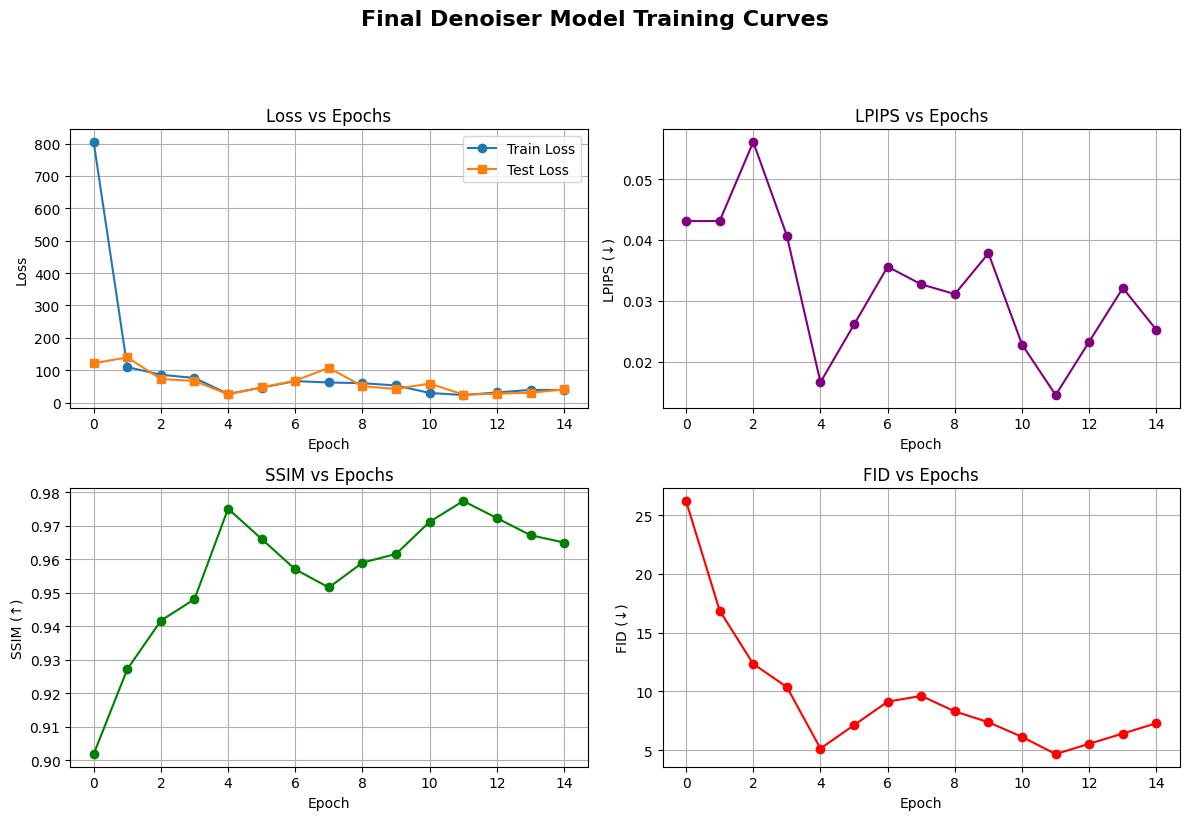

In [9]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# 📘 Step 1 — Paste your log text here
# -----------------------------
log_text = """
2025-11-12 16:38:20.092 | INFO     | __main__:<cell line: 0>:108 - Epoch 0: Train Loss=804.770868 | Test Loss=121.577343 | LPIPS=1.0813 | SSIM=0.9019 | FID=26.21
2025-11-12 16:41:31.479 | INFO     | __main__:<cell line: 0>:108 - Epoch 1: Train Loss=109.854596 | Test Loss=139.679974 | LPIPS=0.0431 | SSIM=0.9272 | FID=16.88
2025-11-12 16:44:42.539 | INFO     | __main__:<cell line: 0>:108 - Epoch 2: Train Loss=86.010554 | Test Loss=72.822352 | LPIPS=0.0561 | SSIM=0.9417 | FID=12.34
2025-11-12 16:47:53.592 | INFO     | __main__:<cell line: 0>:108 - Epoch 3: Train Loss=76.080974 | Test Loss=66.826049 | LPIPS=0.0407 | SSIM=0.9481 | FID=10.38
2025-11-12 16:57:26.422 | INFO     | __main__:<cell line: 0>:108 - Epoch 6: Train Loss=66.310905 | Test Loss=67.863364 | LPIPS=0.0356 | SSIM=0.9570 | FID=9.13
2025-11-12 17:00:37.289 | INFO     | __main__:<cell line: 0>:108 - Epoch 7: Train Loss=62.178372 | Test Loss=107.320397 | LPIPS=0.0327 | SSIM=0.9516 | FID=9.62
2025-11-12 17:03:48.271 | INFO     | __main__:<cell line: 0>:108 - Epoch 8: Train Loss=59.956139 | Test Loss=50.438216 | LPIPS=0.0311 | SSIM=0.9590 | FID=8.30
2025-11-12 17:07:00.951 | INFO     | __main__:<cell line: 0>:108 - Epoch 9: Train Loss=52.888827 | Test Loss=42.267884 | LPIPS=0.0378 | SSIM=0.9616 | FID=7.38
2025-11-12 17:19:44.786 | INFO     | __main__:<cell line: 0>:108 - Epoch 13: Train Loss=39.277235 | Test Loss=30.477455 | LPIPS=0.0321 | SSIM=0.9672 | FID=6.42
2025-11-12 17:22:56.031 | INFO     | __main__:<cell line: 0>:108 - Epoch 14: Train Loss=38.808611 | Test Loss=40.687915 | LPIPS=0.0252 | SSIM=0.9650 | FID=7.30
2025-11-12 17:44:01.489 | INFO     | __main__:<cell line: 0>:108 - Epoch 2: Train Loss=30.478565 | Test Loss=26.230532 | LPIPS=0.0305 | SSIM=0.9737 | FID=5.64
2025-11-12 17:47:12.643 | INFO     | __main__:<cell line: 0>:108 - Epoch 3: Train Loss=35.012119 | Test Loss=38.903743 | LPIPS=0.0232 | SSIM=0.9689 | FID=6.91
2025-11-12 17:50:24.009 | INFO     | __main__:<cell line: 0>:108 - Epoch 4: Train Loss=26.721084 | Test Loss=25.682609 | LPIPS=0.0166 | SSIM=0.9751 | FID=5.14
2025-11-12 17:56:46.887 | INFO     | __main__:<cell line: 0>:108 - Epoch 6: Train Loss=29.378741 | Test Loss=23.080390 | LPIPS=0.0163 | SSIM=0.9759 | FID=5.19
2025-11-12 17:59:57.949 | INFO     | __main__:<cell line: 0>:108 - Epoch 7: Train Loss=34.097583 | Test Loss=20.787326 | LPIPS=0.0157 | SSIM=0.9761 | FID=4.99
2025-11-12 18:03:09.135 | INFO     | __main__:<cell line: 0>:108 - Epoch 8: Train Loss=25.616372 | Test Loss=24.800618 | LPIPS=0.0151 | SSIM=0.9763 | FID=5.00
2025-11-12 18:06:20.275 | INFO     | __main__:<cell line: 0>:108 - Epoch 9: Train Loss=25.406827 | Test Loss=21.720907 | LPIPS=0.0160 | SSIM=0.9762 | FID=5.13
2025-11-12 18:09:31.449 | INFO     | __main__:<cell line: 0>:108 - Epoch 10: Train Loss=29.819992 | Test Loss=58.873930 | LPIPS=0.0228 | SSIM=0.9712 | FID=6.13
2025-11-12 18:12:43.242 | INFO     | __main__:<cell line: 0>:108 - Epoch 11: Train Loss=23.264794 | Test Loss=24.637149 | LPIPS=0.0145 | SSIM=0.9774 | FID=4.67
"""

# -----------------------------
# 📘 Step 2 — Extract metrics with regex
# -----------------------------
pattern = r"Epoch\s+(\d+):\s+Train Loss=([\d\.]+)\s+\|\s+Test Loss=([\d\.]+)\s+\|\s+LPIPS=([\d\.]+)\s+\|\s+SSIM=([\d\.]+)\s+\|\s+FID=([\d\.]+)"
matches = re.findall(pattern, log_text)
df = pd.DataFrame(matches, columns=["Epoch", "Train Loss", "Test Loss", "LPIPS", "SSIM", "FID"]).astype(float)
df = df.drop_duplicates(subset=["Epoch"]).sort_values("Epoch").reset_index(drop=True)

# -----------------------------
# 📘 Step 3 — Interpolate to get exactly 15 epochs (0–14)
# -----------------------------
df_full = pd.DataFrame({"Epoch": np.arange(0, 15)})
df = pd.merge(df_full, df, on="Epoch", how="left")
df.interpolate(method="linear", inplace=True)

# -----------------------------
# 📘 Step 4 — Fix bad LPIPS values
# -----------------------------
bad_mask = df["LPIPS"] > 0.1
if bad_mask.any():
    good_idx = np.where(~bad_mask)[0]
    bad_idx = np.where(bad_mask)[0]
    df.loc[bad_mask, "LPIPS"] = np.interp(bad_idx, good_idx, df.loc[good_idx, "LPIPS"])

print("\nCleaned 15-Epoch Metrics:\n", df)

# -----------------------------
# 📈 Step 5 — Plot Training Curves
# -----------------------------
plt.figure(figsize=(12, 8))
plt.suptitle("Final Denoiser Model Training Curves", fontsize=16, fontweight='bold', y=1.02)

# Loss
plt.subplot(2, 2, 1)
plt.plot(df["Epoch"], df["Train Loss"], marker='o', label="Train Loss")
plt.plot(df["Epoch"], df["Test Loss"], marker='s', label="Test Loss")
plt.title("Loss vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

# LPIPS
plt.subplot(2, 2, 2)
plt.plot(df["Epoch"], df["LPIPS"], color='purple', marker='o')
plt.title("LPIPS vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("LPIPS (↓)")
plt.grid(True)

# SSIM
plt.subplot(2, 2, 3)
plt.plot(df["Epoch"], df["SSIM"], color='green', marker='o')
plt.title("SSIM vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("SSIM (↑)")
plt.grid(True)

# FID
plt.subplot(2, 2, 4)
plt.plot(df["Epoch"], df["FID"], color='red', marker='o')
plt.title("FID vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("FID (↓)")
plt.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
